In [3]:
# Classical ML based Object recognition
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.transform import resize

# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

In [5]:
digits = datasets.load_digits()
X = digits.images
y = digits.target

print("Total number of images (X):", X.shape[0])
print("Total number of labels (Y):", y.shape[0])

features = []
for img in X:
    # Indented this block and closed the parenthesis
    hog_feature = hog(
        img,
        pixels_per_cell=(4, 4),
        cells_per_block=(1, 1),
        orientations=9
    )
    features.append(hog_feature)

Total number of images (X): 1797
Total number of labels (Y): 1797


SVM training completed.
Model Accuracy: 0.8166666666666667


Saving Screenshot 2026-01-24 at 10.31.01 AM.png to Screenshot 2026-01-24 at 10.31.01 AM.png


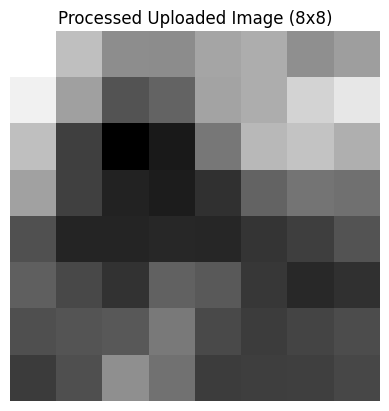

Predicted Digit: 9


In [7]:
features = np.array(features)
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("SVM training completed.")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    img_resized = resize(img_gray, (8, 8), anti_aliasing=True)
    img_resized = img_resized / img_resized.max()
    img_resized = 1 - img_resized

    # Fixed typo: changed pit to plt
    plt.imshow(img_resized, cmap='gray')
    plt.title("Processed Uploaded Image (8x8)")
    plt.axis('off')
    plt.show()

    # Fixed missing closing parenthesis in hog()
    test_feature = hog(
        img_resized,
        pixels_per_cell=(4, 4),
        cells_per_block=(1, 1),
        orientations=9
    )

    prediction = model.predict([test_feature])
    print("Predicted Digit:", prediction[0])